# Solar Data Discovery/ BENIN: Week 0 Challenge 
Data Profiling, Cleaning, and Exploratory Data Analysis (EDA)




1. importing  Necessary packages

In [30]:
# import necessary Packages ...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2. Load dataset (BENIN)

In [21]:
file_path = "E:/Tenx/data/benin-malanville.csv"
df = pd.read_csv(file_path)

# Show first few rows
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


3. Statistics Summary & Missing Values analysis

In [22]:
# Summary stats
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [23]:
# Missing values report
df.isna().sum().sort_values(ascending=False)

Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

In [24]:
# Flag columns with >5% missing
missing_cols = df.columns[df.isna().mean() > 0.05]
print("Columns with >5% missing:", missing_cols.tolist())

Columns with >5% missing: ['Comments']


4. Outlier Detection with Z-Scores

In [25]:
from scipy.stats import zscore

key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[key_cols].apply(zscore)

# Flag outliers
outliers = (z_scores.abs() > 3)
df['outlier_flag'] = outliers.any(axis=1)

# Check how many outliers
df['outlier_flag'].value_counts()


outlier_flag
False    517860
True       7740
Name: count, dtype: int64

5. Time Series Visualization

<Figure size 1500x500 with 0 Axes>

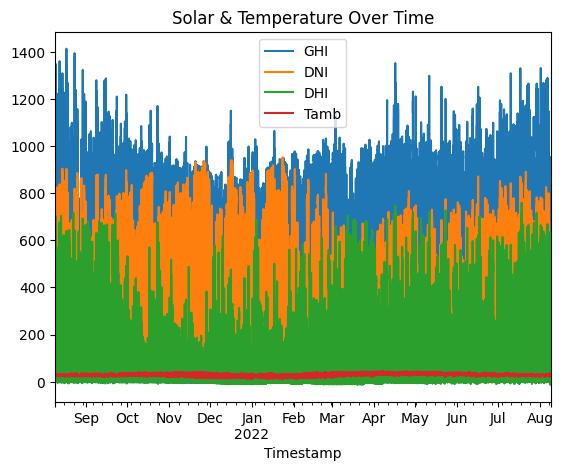

In [26]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(15, 5))
df.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot()
plt.title("Solar & Temperature Over Time")
plt.show()


6. Correlation and Scatter Plots

<Axes: >

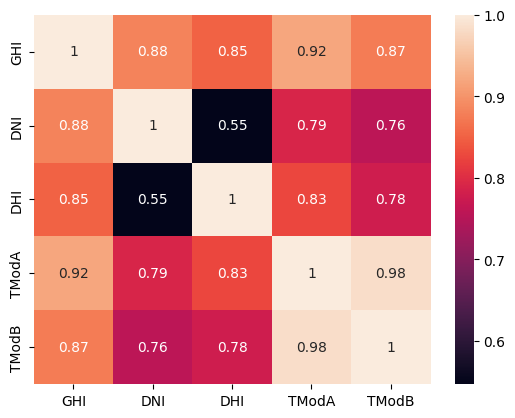

In [27]:

# Heatmap
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True)

<Axes: xlabel='WS', ylabel='GHI'>

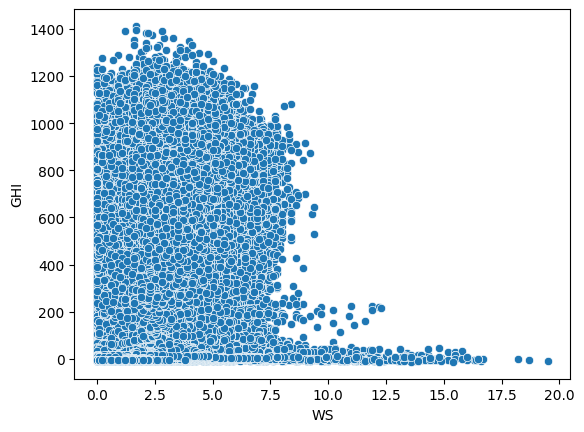

In [28]:
# Scatter plot
sns.scatterplot(x='WS', y='GHI', data=df)

<Axes: xlabel='RH', ylabel='Tamb'>

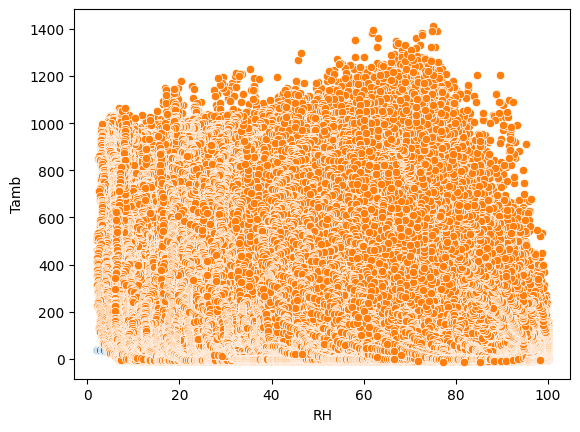

In [ ]:
# Temperature and RH Influence 
sns.scatterplot(x='RH', y='Tamb', data=df)
sns.scatterplot(x='RH', y='GHI', data=df)
